In [0]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [0]:
freq_dic={}
col_dic={}

def preprocess(name):
    
    df = pd.read_csv(name)
    df.drop(['Ticket','PassengerId'], 1, inplace=True)
    
    for i in range(len(df)):
        dtlower=df["Name"][i].lower()
        
        if('mrs' in dtlower):
            df["Name"][i]="Mrs"
        elif ('mr' in dtlower):
            df["Name"][i]="Mr"
        elif ('miss' in dtlower):
            df["Name"][i]="Miss"
        elif ('master' in dtlower):
            df["Name"][i]="Master"
        else:
            df["Name"][i]="None"
            
    for i in range(len(df)):
        cablow=str(df['Cabin'][i]).lower()

        if('nan' in cablow):
            df["Cabin"][i]="Z"
        elif ('a' in cablow):
            df["Cabin"][i]="A"
        elif ('b' in cablow):
            df["Cabin"][i]="B"
        elif ('c' in cablow):
            df["Cabin"][i]="C"
        elif ('d' in cablow):
            df["Cabin"][i]="D"
        elif ('e' in cablow):
            df["Cabin"][i]="E"
        elif ('f' in cablow):
            df["Cabin"][i]="F"
        elif ('t' in cablow):
            df["Cabin"][i]="T"
        elif ('g' in cablow):
            df["Cabin"][i]="G"
        else:    
            df["Cabin"][i]="Z"   
 
            
    df_nan=df.copy()
    df.dropna(inplace=True)

    columns = df.columns.values

    for column in columns:
        y=df[column].value_counts().idxmax()
        freq_dic[column]=y
        df_nan[column].fillna(y, inplace = True) 
        
    print('\nHandling non numerical data---------------------\n')
    
    for column in columns:
        if not (np.issubdtype(df_nan[column].dtype, np.number)):
            dict_tocategory={}
            column_contents = df_nan[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                dict_tocategory[unique]=x
                x+=1

            print(dict_tocategory)
            for i in range(len(column_contents)):
                column_contents[i]=dict_tocategory[column_contents[i]]

            df_nan[column]=column_contents
            col_dic[column]=dict_tocategory
            
    df_nan['Family_Size']=df_nan['SibSp']+df_nan['Parch']
    df_nan['Age_Class']=df_nan['Age']*df_nan['Pclass']
    df_nan['Fare_Per_Person']=df_nan['Fare']/(df_nan['Family_Size']+1)
    
    #df_nan['Fare']=df_nan['Fare'].astype(int, inplace=True)
    #df_nan['Age']=(df_nan['Age']/5).astype(int, inplace=True)
    return df_nan

In [48]:
df=preprocess('train.csv')
print(df.shape)
df


Handling non numerical data---------------------

{'Miss': 0, 'Mr': 1, 'None': 2, 'Mrs': 3, 'Master': 4}
{'female': 0, 'male': 1}
{'B': 0, 'D': 1, 'T': 2, 'F': 3, 'C': 4, 'A': 5, 'Z': 6, 'E': 7, 'G': 8}
{'S': 0, 'C': 1, 'Q': 2}
(891, 13)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Age_Class,Fare_Per_Person
0,0,3,1,1,22.0,1,0,7.2500,6,0,1,66.0,3.62500
1,1,1,3,0,38.0,1,0,71.2833,4,1,1,38.0,35.64165
2,1,3,0,0,26.0,0,0,7.9250,6,2,0,78.0,7.92500
3,1,1,3,0,35.0,1,0,53.1000,4,0,1,35.0,26.55000
4,0,3,1,1,35.0,0,0,8.0500,6,0,0,105.0,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,2,1,27.0,0,0,13.0000,6,0,0,54.0,13.00000
887,1,1,0,0,19.0,0,0,30.0000,0,0,0,19.0,30.00000
888,0,3,0,0,24.0,1,2,23.4500,6,0,3,72.0,5.86250
889,1,1,1,1,26.0,0,0,30.0000,4,1,0,26.0,30.00000


In [49]:
print(list(df.columns))

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Age_Class', 'Fare_Per_Person']


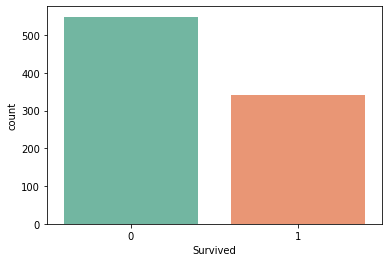

In [50]:
ax1 = sb.countplot(x='Survived', data=df, palette='Set2')   #'pallete' is 'colormap' in matplotlib

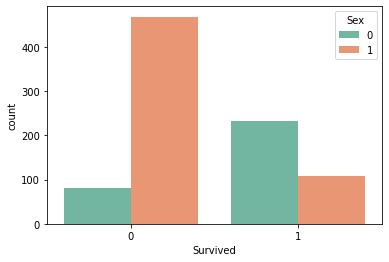

In [51]:
ax2 = sb.countplot(x='Survived', hue='Sex',data=df, palette='Set2')   #'pallete' is 'colormap' in matplotlib

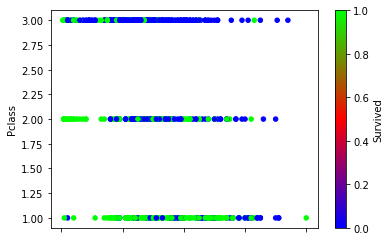

In [52]:
#assign object?
ax1_=df.plot(x='Age', y='Pclass', c='Survived',kind='scatter', colormap='brg')

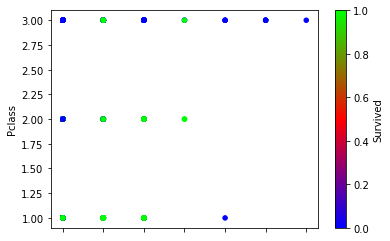

In [53]:
#assign object?
ax1_=df.plot(x='Parch', y='Pclass', c='Survived',kind='scatter', colormap='brg')

In [54]:
df2=pd.crosstab(df.Embarked, df.Survived)                   #returns a dataframe
print(df2)

Survived    0    1
Embarked          
0         427  218
1          75   93
2          47   31


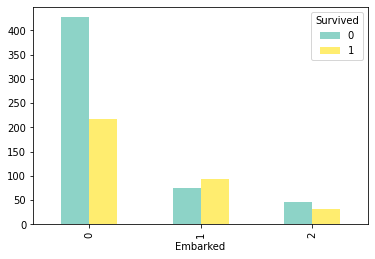

In [55]:
df2.plot(kind='bar', colormap='Set3')

In [0]:
df=df.sample(frac=1)

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_train=df.drop(['Survived'],1)
Y_train=df['Survived']

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)


Decision trees and Random Forests do not require feature scaling

# GridSearch

GridSearch automatically uses K Fold validation uses X_train as both train and validation set in cv=5 cycles

In [0]:
import keras
from keras import losses
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

num_classes=2
y_train = keras.utils.to_categorical(Y_train, num_classes)
model_no=0

In [0]:
def model_me(a,b,c,d,e,f,act):

    model = Sequential()
    
    model.add(Dense(a, input_shape=(12,), activation=act))
    
    model.add(Dropout(d))
    
    model.add(Dense(b, activation=act))
    
    model.add(Dropout(d))
    
    model.add(Dense(c, activation=act))
    
    model.add(Dropout(e))
    
    model.add(Dense(f, activation=act))
    
    model.add(Dropout(e))
    
    model.add(Dense(2, activation='softmax', name='output'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    
    global model_no
    print('Done a NN model: ',model_no)
    model_no+=1
    #print(model.summary())
    return model

In [60]:
model = KerasClassifier(build_fn=model_me, verbose=0)

param_grid = {'epochs':[50],              #,20,30,40,50],
             'batch_size':[8],           #,16,32,64],
             'act':['elu'],           #,'elu','sigmoid'],
               'a':[16,32,64],
               'b':[16,32,64],
               'c':[16,32],
               'f':[8,16],
               'd':[0.4],
               'e':[0.3]
             }

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid_obj = grid.fit(X_train_std, y_train)

Done a NN model:  0
Done a NN model:  1
Done a NN model:  2
Done a NN model:  3
Done a NN model:  4
Done a NN model:  5
Done a NN model:  6
Done a NN model:  7
Done a NN model:  8
Done a NN model:  9
Done a NN model:  10
Done a NN model:  11
Done a NN model:  12
Done a NN model:  13
Done a NN model:  14
Done a NN model:  15
Done a NN model:  16
Done a NN model:  17
Done a NN model:  18
Done a NN model:  19
Done a NN model:  20
Done a NN model:  21
Done a NN model:  22
Done a NN model:  23
Done a NN model:  24
Done a NN model:  25
Done a NN model:  26
Done a NN model:  27
Done a NN model:  28
Done a NN model:  29
Done a NN model:  30
Done a NN model:  31
Done a NN model:  32
Done a NN model:  33
Done a NN model:  34
Done a NN model:  35
Done a NN model:  36
Done a NN model:  37
Done a NN model:  38
Done a NN model:  39
Done a NN model:  40
Done a NN model:  41
Done a NN model:  42
Done a NN model:  43
Done a NN model:  44
Done a NN model:  45
Done a NN model:  46
Done a NN model:  47
Do

In [61]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

#again Fit the best algorithm to the data. 
clf.fit(X_train_std, y_train)

Done a NN model:  181


In [62]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
pd.DataFrame(grid_obj.cv_results_).loc[:,['params','mean_test_score','rank_test_score']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,params,mean_test_score,rank_test_score
0,"{'a': 16, 'act': 'elu', 'b': 16, 'batch_size': 8, 'c': 16, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 8}",0.819308,30
1,"{'a': 16, 'act': 'elu', 'b': 16, 'batch_size': 8, 'c': 16, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 16}",0.812579,35
2,"{'a': 16, 'act': 'elu', 'b': 16, 'batch_size': 8, 'c': 32, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 8}",0.822660,19
3,"{'a': 16, 'act': 'elu', 'b': 16, 'batch_size': 8, 'c': 32, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 16}",0.820426,27
4,"{'a': 16, 'act': 'elu', 'b': 32, 'batch_size': 8, 'c': 16, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 8}",0.829402,2
5,"{'a': 16, 'act': 'elu', 'b': 32, 'batch_size': 8, 'c': 16, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 16}",0.824907,9
6,"{'a': 16, 'act': 'elu', 'b': 32, 'batch_size': 8, 'c': 32, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 8}",0.821543,21
7,"{'a': 16, 'act': 'elu', 'b': 32, 'batch_size': 8, 'c': 32, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 16}",0.815931,33
8,"{'a': 16, 'act': 'elu', 'b': 64, 'batch_size': 8, 'c': 16, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 8}",0.810326,36
9,"{'a': 16, 'act': 'elu', 'b': 64, 'batch_size': 8, 'c': 16, 'd': 0.4, 'e': 0.3, 'epochs': 50, 'f': 16}",0.821530,25


In [63]:
clf.score(X_train_std,y_train)

0.8361391425132751

In [0]:
def testdata():
    
    df = pd.read_csv('test.csv')    
    df.drop(['Ticket','PassengerId'], 1, inplace=True)
    columns = df.columns.values
    
    for i in range(len(df)):
        dtlower=df["Name"][i].lower()
        
        if('mrs' in dtlower):
            df["Name"][i]="Mrs"
        elif ('mr' in dtlower):
            df["Name"][i]="Mr"
        elif ('miss' in dtlower):
            df["Name"][i]="Miss"
        elif ('master' in dtlower):
            df["Name"][i]="Master"
        else:
            df["Name"][i]="None"
    
    for i in range(len(df)):
        cablow=str(df['Cabin'][i]).lower()

        if('nan' in cablow):
            df["Cabin"][i]="Z"
        elif ('a' in cablow):
            df["Cabin"][i]="A"
        elif ('b' in cablow):
            df["Cabin"][i]="B"
        elif ('c' in cablow):
            df["Cabin"][i]="C"
        elif ('d' in cablow):
            df["Cabin"][i]="D"
        elif ('e' in cablow):
            df["Cabin"][i]="E"
        elif ('f' in cablow):
            df["Cabin"][i]="F"
        elif ('t' in cablow):
            df["Cabin"][i]="T"
        elif ('g' in cablow):
            df["Cabin"][i]="G"
        else:    
            df["Cabin"][i]="Z"  
            
   
   
    for column in columns:
        df[column].fillna(freq_dic[column], inplace = True) 
        
    print('\nHandling non numerical data---------------------\n')
    
    for column in columns:
        if not (np.issubdtype(df[column].dtype, np.number)):
            dict_tocategory=col_dic[column]     
            column_contents = df[column].values.tolist()   
            print(dict_tocategory)
            for i in range(len(column_contents)):
                column_contents[i]=dict_tocategory[column_contents[i]]

            df[column]=column_contents

    df['Family_Size']=df['SibSp']+df['Parch']
    df['Age_Class']=df['Age']*df['Pclass']
    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
    
    
    return df

In [65]:
X_test=testdata()
X_test_std = std_scale.transform(X_test)


Handling non numerical data---------------------

{'Miss': 0, 'Mr': 1, 'None': 2, 'Mrs': 3, 'Master': 4}
{'female': 0, 'male': 1}
{'B': 0, 'D': 1, 'T': 2, 'F': 3, 'C': 4, 'A': 5, 'Z': 6, 'E': 7, 'G': 8}
{'S': 0, 'C': 1, 'Q': 2}


In [66]:
X_test_std.shape

(418, 12)

In [67]:
X_test_std

array([[ 0.82737724, -0.23233709,  0.73769513, ..., -0.56097483,
         1.30368267, -0.33743135],
       [ 0.82737724,  1.63263898, -1.35557354, ...,  0.05915988,
         2.48240538, -0.45828736],
       [-0.36936484, -0.23233709,  0.73769513, ..., -0.56097483,
         1.94805108, -0.28555416],
       ...,
       [ 0.82737724, -0.23233709,  0.73769513, ..., -0.56097483,
         1.68087394, -0.35360057],
       [ 0.82737724, -0.23233709,  0.73769513, ..., -0.56097483,
         0.31355559, -0.33126739],
       [ 0.82737724,  2.56512701,  0.73769513, ...,  0.67929458,
         0.31355559, -0.34794004]])

In [68]:
result=clf.predict(X_test_std)
result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
dfsubmit = pd.read_csv('gs.csv')    
dfsubmit['Survived']=result
dfsubmit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
dfsubmit.to_csv('result.csv',header=True, index=False)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [71]:
X_test_std[0].shape

(12,)

In [72]:
#use slicing to test for single record!
clf.predict(X_test_std[0:5])

array([0, 0, 0, 0, 1])